In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import  seaborn as sns
df = pd.read_csv('movies_metadata.csv',low_memory=False)
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


understanding  data

In [3]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
df.tail()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
14166,False,NaN,50000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",http://gamerthemovie.com,18501,tt1034032,en,Gamer,Mind-control technology has taken society by a...,9.730681,/csbqdb7VUhGDkNsS3hjV16pwZ9e.jpg,"[{'name': 'Lakeshore Entertainment', 'id': 126...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-09-03,40828540,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"In the near future, you don't live to play... ...",Gamer,False,5.6,778.0
14167,False,"{'id': 177467, 'name': 'Cloudy with a Chance o...",100000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://www.cloudywithachanceofmeatballs.com/,22794,tt0844471,en,Cloudy with a Chance of Meatballs,Inventor Flint Lockwood creates a machine that...,11.665693,/75QV0rNm6QHpMnpIGrZK0ev08rH.jpg,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-09-17,242988466,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Prepare to get served.,Cloudy with a Chance of Meatballs,False,6.5,1799.0
14168,False,NaN,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",NaN,279606,tt0110936,en,Radio Inside,As two brothers fall in love with the same wom...,0.686178,/tzHnUysVTZ9yaCF4MvAqaKWmuq4.jpg,"[{'name': 'Capitol Films', 'id': 826}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1994-03-15,0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What do you do if the one you want is the one ...,Radio Inside,False,0.0,0.0
14169,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,26367,tt1385912,en,I Can Do Bad All By Myself,When Madea catches sixteen-year-old Jennifer a...,1.805018,/ofj0c2zE5uYrjjlSLXtrMMAz3O0.jpg,"[{'name': 'Lions Gate Films', 'id': 35}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-09-11,0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,I Can Do Bad All By Myself,False,6.0,40.0
14170,False,NaN,0,"[{'id': 10751, 'name': 'Family'}, {'id': 18, '...",NaN,43757,tt0108137,en,The Silver Stallion,"Australian adaptation of Elyne Mitchell's ""The...",1.024914,/rkcYteAua7NVH8sRnSMBD4QqixE.jpg,"[{'name': 'Film Victoria', 'id': 11840}, {'nam...","[{'iso_3166_1': 'AU', 'name': 'Australia'}]",1993-09-16,0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The magic of the mount,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14171 entries, 0 to 14170
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  14171 non-null  bool   
 1   belongs_to_collection  1898 non-null   object 
 2   budget                 14171 non-null  int64  
 3   genres                 14171 non-null  object 
 4   homepage               1580 non-null   object 
 5   id                     14171 non-null  int64  
 6   imdb_id                14168 non-null  object 
 7   original_language      14171 non-null  object 
 8   original_title         14171 non-null  object 
 9   overview               14119 non-null  object 
 10  popularity             14171 non-null  float64
 11  poster_path            14130 non-null  object 
 12  production_companies   14171 non-null  object 
 13  production_countries   14171 non-null  object 
 14  release_date           14165 non-null  object 
 15  re

In [6]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,1.417100e+04,14171.000000,14171.000000,1.417100e+04,14161.000000,14170.000000,14170.000000
mean,7.913116e+06,32226.902830,4.654141,2.088070e+07,102.974719,6.104143,179.875723
std,2.118737e+07,40315.011718,4.790868,7.446178e+07,28.302117,1.331966,566.135223
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,10478.500000,1.147523,0.000000e+00,91.000000,5.600000,10.000000
50%,0.000000e+00,19929.000000,3.102999,0.000000e+00,100.000000,6.300000,28.000000
75%,3.000000e+06,41047.000000,7.191861,3.815872e+06,112.000000,6.900000,101.000000
max,3.000000e+08,445590.000000,140.950236,1.845034e+09,931.000000,10.000000,12269.000000


In [7]:
df.shape

(14171, 24)

univariate  analysis

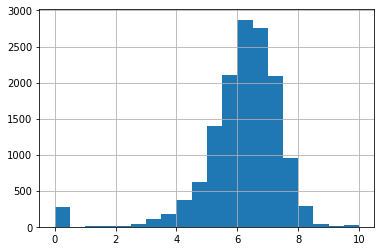

In [8]:
df["vote_average"].hist(bins=20)

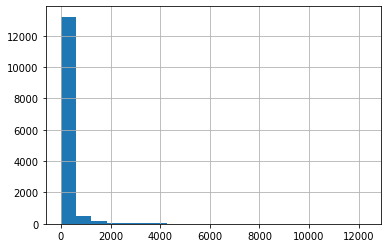

In [9]:
df["vote_count"].hist(bins=20)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


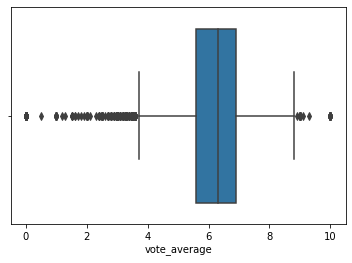

In [13]:
sns.boxplot(df["vote_average"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


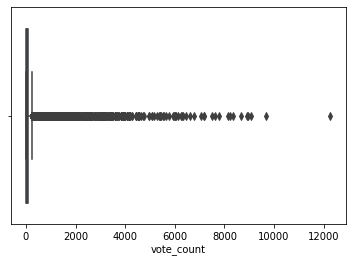

In [14]:
sns.boxplot(df["vote_count"])

Building Recommender system

In [12]:
c=df['vote_average'].mean()
c

6.104142554693051

In [15]:
m=df['vote_count'] .quantile(0.9)
m

383.0

In [16]:
qm=df[(df['runtime']>150)&(df['revenue']>300000000)&(df['homepage'].notna())]

In [17]:
qm.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
522,False,NaN,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.schindlerslist.com/,424,tt0108052,en,Schindler's List,The true story of how businessman Oskar Schind...,41.725123,/yPisjyLweCl1tbgwgtzBCNCBle.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1993-11-29,321365567,195.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,"Whoever saves one life, saves the world entire.",Schindler's List,False,8.3,4436.0
1639,False,NaN,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,tt0120338,en,Titanic,"84 years later, a 101-year-old woman named Ros...",26.889070,/kHXEpyfl6zqn8a6YuozZUujufXf.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-11-18,1845034188,194.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Nothing on Earth could come between them.,Titanic,False,7.5,7770.0
4766,False,"{'id': 1241, 'name': 'Harry Potter Collection'...",125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://harrypotter.warnerbros.com/harrypottera...,671,tt0241527,en,Harry Potter and the Philosopher's Stone,Harry Potter has lived under the stairs at his...,38.187238,/dCtFvscYcXQKTNvyyaQr2g2UacJ.jpg,"[{'name': '1492 Pictures', 'id': 436}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2001-11-16,976475550,152.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Let the Magic Begin.,Harry Potter and the Philosopher's Stone,False,7.5,7188.0
4863,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",93000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,120,tt0120737,en,The Lord of the Rings: The Fellowship of the Ring,"Young hobbit Frodo Baggins, after inheriting a...",32.070725,/bxVxZb5O9OxCO0oRUNdCnpy9NST.jpg,"[{'name': 'WingNut Films', 'id': 11}, {'name':...","[{'iso_3166_1': 'NZ', 'name': 'New Zealand'}, ...",2001-12-18,871368364,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,One ring to rule them all,The Lord of the Rings: The Fellowship of the Ring,False,8.0,8892.0
5814,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",79000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,121,tt0167261,en,The Lord of the Rings: The Two Towers,Frodo and Sam are trekking to Mordor to destro...,29.423537,/wf3v0Pn09jnT5HSaYal7Ami3bdA.jpg,"[{'name': 'WingNut Films', 'id': 11}, {'name':...","[{'iso_3166_1': 'NZ', 'name': 'New Zealand'}, ...",2002-12-18,926287400,179.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Power Is Rising.,The Lord of the Rings: The Two Towers,False,8.0,7641.0


In [18]:
qm.shape

(14, 24)

In [19]:
 qm['vote_count']>=m

522      True
1639     True
4766     True
4863     True
5814     True
7000     True
10554    True
11008    True
11067    True
11827    True
12481    True
13219    True
13605    True
13893    True
Name: vote_count, dtype: bool

In [20]:
qm=qm[qm['vote_count']>=m]

In [21]:
qm.shape

(14, 24)

In [24]:
def wr(x,m=m,c=c):
    v=x['vote_count']
    r=x['vote_average']
    return (v/(v+m)*r)+(m/(m+v)*c)

In [26]:
qm['score']=qm.apply(wr,axis=1)

In [27]:
qm.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,score
522,False,NaN,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.schindlerslist.com/,424,tt0108052,en,Schindler's List,The true story of how businessman Oskar Schind...,41.725123,/yPisjyLweCl1tbgwgtzBCNCBle.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1993-11-29,321365567,195.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,"Whoever saves one life, saves the world entire.",Schindler's List,False,8.3,4436.0,8.125480
1639,False,NaN,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,tt0120338,en,Titanic,"84 years later, a 101-year-old woman named Ros...",26.889070,/kHXEpyfl6zqn8a6YuozZUujufXf.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-11-18,1845034188,194.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Nothing on Earth could come between them.,Titanic,False,7.5,7770.0,7.434427
4766,False,"{'id': 1241, 'name': 'Harry Potter Collection'...",125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://harrypotter.warnerbros.com/harrypottera...,671,tt0241527,en,Harry Potter and the Philosopher's Stone,Harry Potter has lived under the stairs at his...,38.187238,/dCtFvscYcXQKTNvyyaQr2g2UacJ.jpg,"[{'name': '1492 Pictures', 'id': 436}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2001-11-16,976475550,152.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Let the Magic Begin.,Harry Potter and the Philosopher's Stone,False,7.5,7188.0,7.429387
4863,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",93000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,120,tt0120737,en,The Lord of the Rings: The Fellowship of the Ring,"Young hobbit Frodo Baggins, after inheriting a...",32.070725,/bxVxZb5O9OxCO0oRUNdCnpy9NST.jpg,"[{'name': 'WingNut Films', 'id': 11}, {'name':...","[{'iso_3166_1': 'NZ', 'name': 'New Zealand'}, ...",2001-12-18,871368364,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,One ring to rule them all,The Lord of the Rings: The Fellowship of the Ring,False,8.0,8892.0,7.921713
5814,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",79000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,121,tt0167261,en,The Lord of the Rings: The Two Towers,Frodo and Sam are trekking to Mordor to destro...,29.423537,/wf3v0Pn09jnT5HSaYal7Ami3bdA.jpg,"[{'name': 'WingNut Films', 'id': 11}, {'name':...","[{'iso_3166_1': 'NZ', 'name': 'New Zealand'}, ...",2002-12-18,926287400,179.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Power Is Rising.,The Lord of the Rings: The Two Towers,False,8.0,7641.0,7.909507


In [29]:
qm=qm.sort_values('score',ascending=False)

In [30]:
qm[['title','vote_count','vote_average','score']].head(10)

,title,vote_count,vote_average,score
12481,The Dark Knight,12269.0,8.3,8.233527
522,Schindler's List,4436.0,8.3,8.125480
7000,The Lord of the Rings: The Return of the King,8226.0,8.1,8.011208
4863,The Lord of the Rings: The Fellowship of the Ring,8892.0,8.0,7.921713
5814,The Lord of the Rings: The Two Towers,7641.0,8.0,7.909507
13605,Inglourious Basterds,6598.0,7.9,7.801474
1639,Titanic,7770.0,7.5,7.434427
4766,Harry Potter and the Philosopher's Stone,7188.0,7.5,7.429387
10554,Harry Potter and the Goblet of Fire,5758.0,7.5,7.412944
13893,Harry Potter and the Half-Blood Prince,5435.0,7.4,7.314693


Text(0.5, 1.0, 'MOst voted Movies')

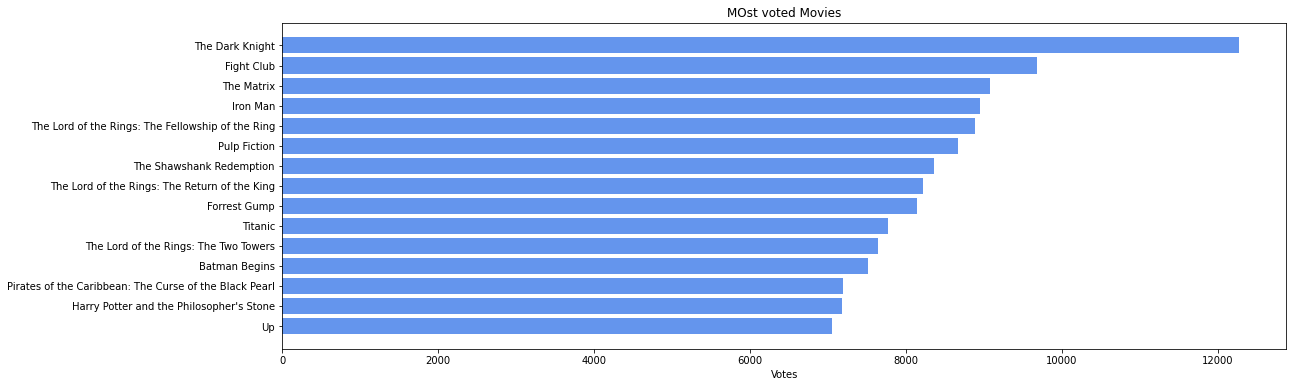

In [31]:
 d=df.sort_values('vote_count',ascending=False)
plt.figure(figsize=(18,6))
 
plt.barh(d['title'].head(15),d['vote_count'].head(15),align='center',color='cornflowerblue')
plt.gca().invert_yaxis()
plt.xlabel("Votes")
plt.title("MOst voted Movies")